In [1]:
import pandas as pd
from nxfvars import nxfvars
from glob import glob
import scanpy as sc
import numpy as np

sc.settings.set_figure_params(figsize=(10, 10))

## Get input data

In [21]:
input_dir = nxfvars.get("input_dir", "../../data/20_integrate_scrnaseq_data/24_solo/")
adata_path = nxfvars.get(
    "adata_path",
    "../../data/20_integrate_scrnaseq_data/23_scvi_umap/integrated_merged_all_all_genes.umap_leiden.h5ad",
)
artifact_dir = nxfvars.get("artifact_dir", "/home/sturm/Downloads")

In [3]:
doublet_df = pd.concat(
    [pd.read_csv(x, index_col=0) for x in glob(f"{input_dir}/*.csv")]
)
doublet_df.index = doublet_df.index.str.replace("-0$", "", regex=True)

In [5]:
adata = sc.read_h5ad(adata_path)

## add doublet information to anndata

In [13]:
adata.obs["doublet_status"] = doublet_df["label"]

## doublet statistics

NA = datasets that have been excluded from doublet detection (that is, Smartseq2 datasets)

In [16]:
adata.obs["doublet_status"].value_counts(dropna=False)

singlet    900512
doublet    177890
NaN         46545
Name: doublet_status, dtype: int64

In [17]:
pd.set_option("display.max_rows", 1000)
adata.obs.groupby("sample").apply(
    lambda df: pd.DataFrame().assign(
        doublet_frac=[np.sum(df["label"] == "doublet") / df.shape[0]], n=[df.shape[0]]
    )
).sort_values("doublet_frac")

,,doublet_frac,n
sample,,,
Guo_Zhang_2018_NSCLC_P1219_NTC,0,0.000000,58
Guo_Zhang_2018_NSCLC_P1202_NTC,0,0.000000,86
Guo_Zhang_2018_NSCLC_P1202_NTH,0,0.000000,80
Guo_Zhang_2018_NSCLC_P1202_NTY,0,0.000000,98
Guo_Zhang_2018_NSCLC_P1202_TTC,0,0.000000,168
Guo_Zhang_2018_NSCLC_P1202_TTH,0,0.000000,136
Guo_Zhang_2018_NSCLC_P1202_TTR,0,0.000000,160
Guo_Zhang_2018_NSCLC_P1202_TTY,0,0.000000,85
Guo_Zhang_2018_NSCLC_P1208_TTC,0,0.000000,75


/home/sturm/.conda/envs/pircher-sc-integrate2/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'doublet_status' as categorical


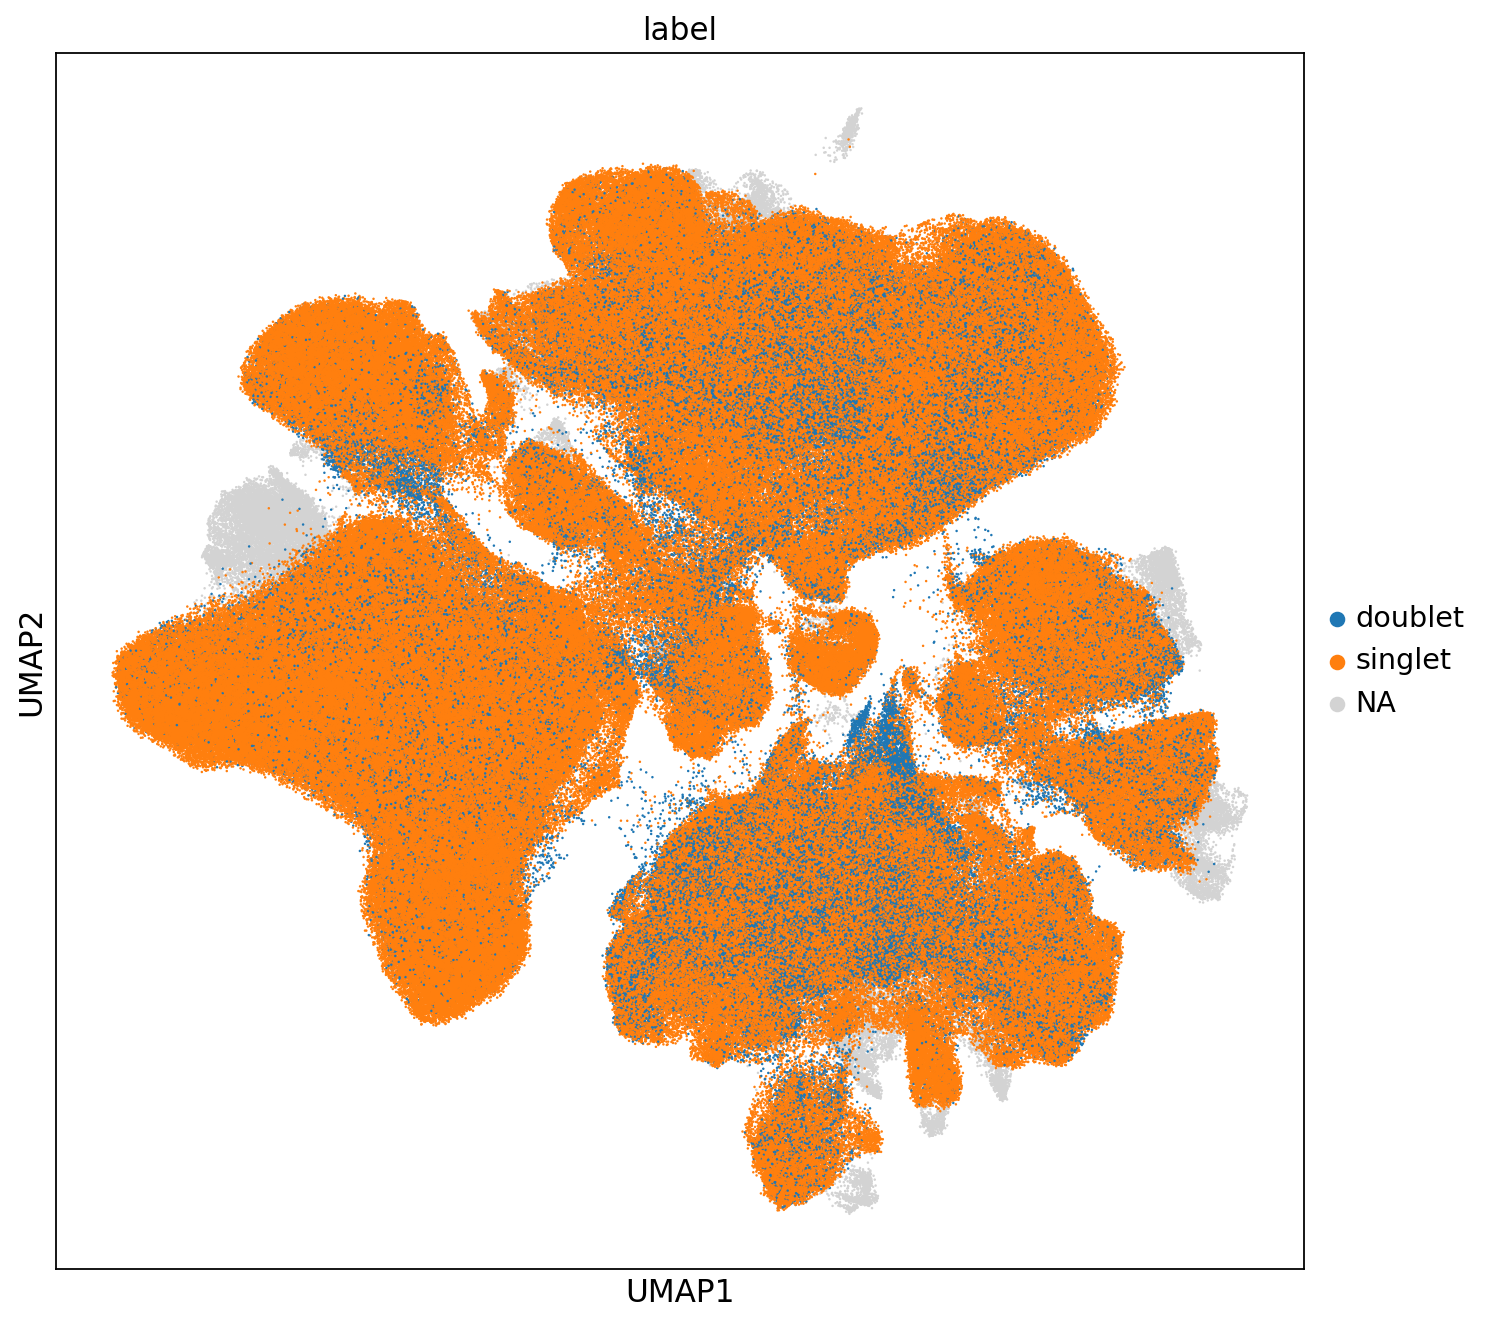

In [18]:
sc.pl.umap(adata, color="label", size=5)

## Exclude doublets

In [19]:
adata_nodoublet = adata[adata.obs["label"] != "doublet", :]

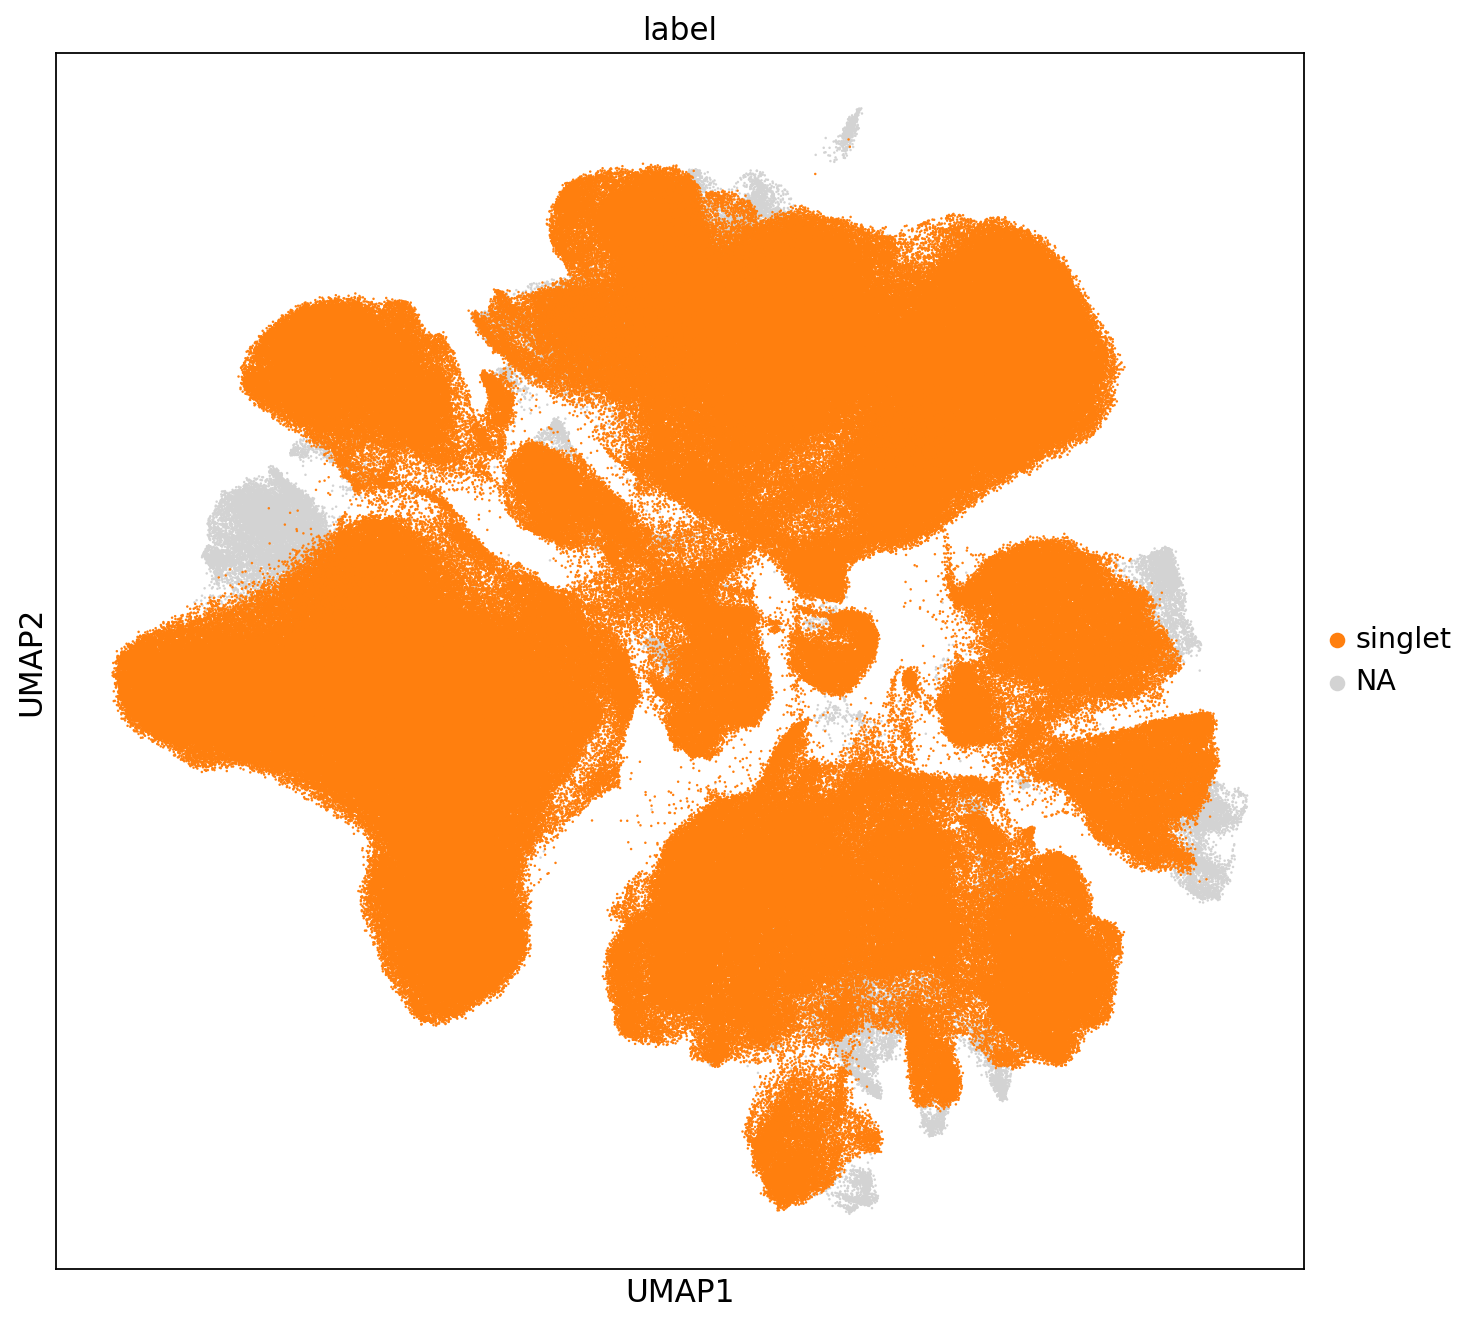

In [20]:
sc.pl.umap(adata_nodoublet, color="label", size=5)

## Write output file

In [38]:
adata.write_h5ad(f"{artifact_dir}/adata.doublet_filtered.h5ad")